# Perceptron

This project aims to train a perceptron model to behave as a simple logic gate.

# Table of Contents

1. [Introduction](#intro)


2. [Logic Gates](#logic)


3. [The Perceptron Algorithm](#tpa)
    1. [Perceptron Struct](#struct)
    2. [Forward Pass](#forward)
    3. [Activation Function](#af)
    
    
4. [The Perceptron Training Rule](#tptr)
    1. [Error Function](#error)
    2. [Delta W](#deltaw)
    3. [Update Weights](#uweights)
    4. [Backward Pass](#bpass)
    
    
5. [Training](#train)
     1. [Import Data](#imdata)
     2. [AND-perceptron](#tandp)
     3. [OR-perceptron](#torp)
     
     
6. [Results](#results)
    1. [Output](#output)
    2. [AND-perceptron](#apr)
    3. [OR-perceptron](#opr)


7. [Conclusion](#conc)


8. [References](#ref)

# Introduction <a class="anchor" id="intro"></a>

The perceptron is a supervised machine learning model for regression and classification problems. The algorithm was developed in the late 1950's by neurobiology professor Frank Rosenblatt of Cornell University. The perceptron is often referred to as an artificial neuron due to it functioning similarly to natural neurons from the brain. Greatly inspired by the way natural neurons function, Rosenblatt worked with the following question in mind:

"What are the minimum things that a brain has to have physicially in order to perform the amazing things it does?"

Today perceptrons are the building blocks of all modern deep learning architectures, they can be considered to be a single node/cell/neuron that's able to classify linearly seperable input data. When multiple neurons are connected in sequence, the resulting neural network is able to perform more complex computations. Complex neural networks can be observed in both deep artificial neural nets as well as in the brain.

The perceptron in this project will be trained to behave as an AND/OR logic gate. 

# Logic Gates <a class="anchor" id="logic"></a>

Logic gates are boolean functions that take in one or more inputs and produce an output of either true or false. Specific logics determine the relationship between the input and output. Perceptrons are able to learn these logics through training and perform as logic gates.

Here are a few examples of logic gates:

#### AND Gate
An AND gate takes in two inputs A and B. The output of the AND gate is true, if and only if inputs A and B are both true. Otherwise the output of the AND gate is false.

#### OR Gate
An OR gate takes in two inputs A and B. The output of the OR Gate is true if either of A and B are true, meaning the OR gate is false if and only if inputs A and B are both false.

#### NAND Gate
A NAND gate (or NOT-AND gate) takes in two inputs A and B and gives the opposite output that of which an AND gate would produce. A NAND gate is false if and only if inputs A and B are both true. 

#### Computational Universality
NAND gates - as well as NOR gates - have a special trait in that they are universl for computation. This means for any given digital logic circuit, regardless of it's complexity, said circuit can be implemented as a network of NAND gates. Perceptrons are universal for computation via simulation of these gates.

#### AND/OR/NAND gate Diagram
![alt text](logic_gate_diagram.png "Logic Gates")


# The Perceptron Algorithm <a class="anchor" id="tpa"></a>

Like a logic gate, a perceptron can recieve one or more input signals and produce an output. Perceptrons have a weight value for each input value. To produce an output, the sum of the inputs and weights are calculated and sent through to a non-linear activation function. The weights can be trained using 'The Perceptron Training Rule'.

#### Perceptron Diagram
![alt text](perceptron_diagram.png "Perceptron")

#### Perceptron Struct <a class="anchor" id="struct"></a>

Our perceptron will be built as a Julia struct containing four values: an input vector $X$, a weights vector $W$, a bias integer **$b$** and an ouptut integer **$ŷ$**. 

$W$ will be initialised with random values to be refined during training. 

$n$ describes the number of inputs, $X$ will have an initial length of $n$ and $W$ will have a length of $n+1$. 

The perceptron will have a bias of $1$ and an initial output of $0$.

\begin{align}
Input = X_{n} &= \begin{bmatrix}
 x_{1} \\ x_{2} \\ . \\ . \\ x_{n}
\end{bmatrix}
,\hspace{1cm} Weights = W_{n} = \begin{bmatrix}
 w_{0} \\ w_{1} \\ . \\ . \\ w_{n}
\end{bmatrix}
,\hspace{1cm}Bias = b = 1
,\hspace{1cm}Initial \hspace{0.1cm} Output = ŷ = 0.  
\end{align}


In [1]:
#= 

Perceptron struct
    
    Contains:
        - X: n-element Input Vector.
        - W: (n+1)-element Weights Vector.
        - b: Bias Integer.
        - ŷ: Output Integer.

    Note:
        Perceptron struct must be Mutable to allow for variables to be changed after decleration.
=#

mutable struct Perceptron
    X::Vector{Int64}
    W::Vector{Float16}
    b::Int64
    ŷ::Int64
    
    function Perceptron(n)
        new(
            zeros(n), 
            rand(Float16, n + 1), 
            1, 
            0
        )
    end

end

#### Forward Pass <a class="anchor" id="forward"></a>

Part of the job of a perceptron is to calculate the weighted sum of it's inputs and produce a pre-activation value $z$. The weighted sum of a perceptron can be modeled as the dot product of $W$ and $X$ add the bias term **$b$**.

**$z$** is then fed into an activation function $Θ$ which will either fire (return $1$) or not fire (return $0$), depending on the characteristics of **$z$**. 

There are many activation functions to choose from, each with distinct characteristics. We'll be using a threshold function described in the next section.

Here's how a perceptron produces an output:


\begin{equation}
\\
\hspace{0.3cm} \Large z =  \Sigma (weights * inputs) + bias
\end{equation}


\begin{equation}
\Large  ŷ = \theta(z)
\end{equation}









In [2]:
using LinearAlgebra

#= 
Forward pass through the perceptron
    
    1. Append the bias integer (b) to the input vector (X).
    2. Take the weighted sum/dot product (z) of the input vector (inputs) and weights vector (weights).
    3. Assign the Heaviside step function of the weighted sum to the Perceptrons' output (ŷ).

    Parameters:
        Some perceptron 'p'.

    Returns:
        Some integer output 'ŷ'.
=#

function forward_pass(p::Perceptron)
    
        push!(p.X, p.b)
    
        z = dot(p.X, p.W)
    
        p.ŷ = H(z)
    
    end

forward_pass (generic function with 1 method)

#### Activation Function  (Heaviside Step Function) <a class="anchor" id="af"></a>

Activation functions dictate the output of a perceptron.

A threshold activation function takes in some input $z$ and evaluates it against some threshold value $t$. 

The threshold function only fires when $z > t$ (where the input is above the threshold value). Otherwise if $z ≤ t$ the function does not fire.

The Heaviside Step Function is a piecewise function frequently used in Fourier transforms. The function takes some input $z$ and returns $1$ if $z > 0$; otherwise it'll return $0$.

The Heaviside Step Function:





\begin{equation*}
\Large 
 H(z) = \left\{
        \begin{array}{ll}
            0 & \quad z \leq 0 \\
            1 & \quad z > 0
        \end{array}
    \right.
\end{equation*}

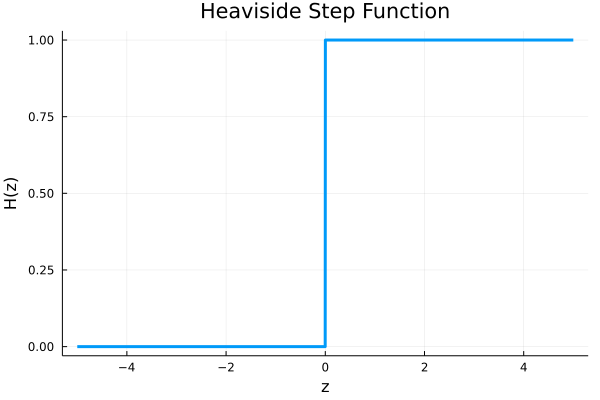

In [3]:
#= 
Heaviside Step Function

    Parameters:
        Some integer 'z'.

    Returns:
        0 for negative argument 'z'.
        1 for positive argument 'z'.
=#

function H(z)
    
        if z < 0
            return 0
        
        else
            return 1
        
        end
end

#= 
Plot Heaviside Step Function 
=#

using Plots

plot(z -> H(z), title = "Heaviside Step Function", lw = 3, ylabel="H(z)", xlabel="z", label=false)

# The Perceptron Training Rule <a class="anchor" id="tptr"></a>

The Perceptron Training Rule is a method for iteratively modifying a perceptron's weights whenever it returns an undesireable output. 

Consider the weight value $w_{i}$ from the perceptron weight vector $W$, The Perceptron Training Rule States:

\begin{equation}
\hspace{0.3cm} \Large w_{i} =  w_{i} + Δw_{i}
\end{equation}

\begin{equation}
\hspace{0.3cm} \Large Δw_{i} = \alpha*(y-ŷ)*x_{i}
\end{equation}

In other words:
\begin{equation}
\hspace{0.3cm} \large Updated \hspace{0.2cm} Weight \hspace{0.2cm} Value =  Old \hspace{0.2cm}  Weight \hspace{0.2cm} Value + Weight \hspace{0.2cm} Update
\end{equation}

Where:

\begin{equation}
\large Weight \hspace{0.2cm} Update =  Learning \hspace{0.2cm}  Rate * Error * Input \hspace{0.2cm} Value
\end{equation}

#### Error Function <a class="anchor" id="error"></a>

The perceptron error measures the distance of the perceptron output (*ŷ*) from the training/expected output (*y*).

The error value plays a role in how far the perceptron weights will be 'nudged' during training.

\begin{equation}
\\
\hspace{0.3cm} \large Output \hspace{0.2cm} Error =  Expected \hspace{0.2cm} Output - Perceptron \hspace{0.2cm} Output
\end{equation}


In [4]:
#= 
Output Error
    
    Parameters:
        Some label/expected output 'y'.
        Some Perceptron 'p'.

    Returns:
        The difference between the expected output 'y' and the calculated perceptron output 'ŷ'.
=#

function output_error(y, p::Perceptron)
    
    return y - p.ŷ
    
end

output_error (generic function with 1 method)

#### Delta W <a class="anchor" id="deltaw"></a>

$Δw_{i}$ represents how much the weights vector $W$ should change in order to update it.

$α$ is the learning rate, if it's too large weights will never converge and if it is too small they will take a very long time to converge. The learning rate moderates the weight changes so they do not go too far in any given direction.

$Δw_{i}$ also takes in the error function (as stated above) and the input vector for a given step.


\begin{equation}
\hspace{0.3cm} \Large Δw_{i} = \alpha*(y-ŷ)*x_{i}
\end{equation}

\begin{equation}
\large Weight \hspace{0.2cm} Update =  Learning \hspace{0.2cm}  Rate * Error * Input \hspace{0.2cm} Value
\end{equation}


In [5]:
#= 
Delta W
    
    Parameters:
        Some learning rate 'α'.
        Some error value 'error'.
        Some perceptron 'p'.

    Returns:
        A vector (ΔW) suggesting the degree in which the weights vector of the perceptron (weights) should be changed.

        Where ΔW = learning Rate(α) X Output Error(error) X Input Vector(inputs).
=#

function delta_w( α, error, p::Perceptron)
    
    return α * error * p.X
    
end

delta_w (generic function with 1 method)

#### Update Weights <a class="anchor" id="uweights"></a>

This function updates each $w_{i}$ value from the weight vector $W$.

\begin{equation}
\hspace{0.3cm} \Large w_{i} =  w_{i} + Δw_{i}
\end{equation}


\begin{equation}
\hspace{0.3cm} \large Updated \hspace{0.2cm} Weight \hspace{0.2cm} Value =  Old \hspace{0.2cm}  Weight \hspace{0.2cm} Value + Weight \hspace{0.2cm} Update
\end{equation}

In [6]:
#= 
Update Weights
    
    Parameters:
        Some vector 'ΔW'.
        Some Perceptron 'p'.

    Returns:
        The updated weight vector (weights) of the Perceptron. 
        
        Where weights(updated) =  weights(old) +  ΔW.
=#

function update_weights(ΔW, p::Perceptron)
    
    p.W = p.W + ΔW
    
end

update_weights (generic function with 1 method)

#### Backward Pass <a class="anchor" id="bpass"></a>

This function applies the Perceptron Training Rule in concert.

In [7]:
#= 
Backward Pass back through the Perceptron
    
    1. Calculate the output error of the Perceptron.
    2. Calculate the necesarry weight change (ΔW).
    3. Update the Perceptron weights (weights) according to the weight change.

    Parameters:
        Some Perceptron 'p'.
        Some label/expected output 'y'.
        Some learning rate 'α'.

    Returns:
        The updated weight vector (W1) of the Perceptron. 
=#

function back_pass(p::Perceptron, y, α)
    
    error = output_error(y, p)
    
    ΔW = delta_w(α, error, p)
    
    update_weights(ΔW, p)
    
end

back_pass (generic function with 1 method)

# Training <a class="anchor" id="train"></a>

#### Import Training Data <a class="anchor" id="imdata"></a>

The training data for a logic gate perceptron is essentially a truth table.

In [8]:
#= 
Import Training Dataset
=#
using DataFrames
using CSV

train_set = DataFrame(CSV.File("trainset.csv"))


,x,y,and,or
,Int64,Int64,Int64,Int64
1,0,0,0,0
2,0,1,0,1
3,1,0,0,1
4,1,1,1,1


#### Training AND-perceptron <a class="anchor" id="tandp"></a>

In [9]:
#= 
Training AND-perceptron
=#

epoch = 0

p_and = Perceptron(2)

while epoch < 100
    
    for i in 1:nrow(train_set)
        
        p_and.X = Vector(train_set[i, 1:2])
        
        forward_pass(p_and)
        
        back_pass(p_and, train_set[i, 3], 0.1)
        
        
    end
    
    global epoch += 1
    
end

#### Training OR-perceptron <a class="anchor" id="torp"></a>

In [10]:
#= 
Training OR-Perceptron
=#

epoch = 0

p_or = Perceptron(2)

while epoch < 100
    
    
    for i in 1:nrow(train_set)
        
        p_or.X = Vector(train_set[i, 1:2])
        
        forward_pass(p_or)
        
        back_pass(p_or, train_set[i, 4], 0.1)
        
    end
    
    global epoch += 1
    
end

# Results <a class="anchor" id="results"></a>

#### Output Function <a class="anchor" id="output"></a>

A function to pull an output from some perceptron given some input.

In [11]:
#= 
Output Function
    
    Parameters:
        Some Perceptron 'p'.
        Some 2-element input vector 'input'.

    Returns:
        The calculated Perceptron output 'ŷ'.
=#

function output(p::Perceptron, input::Vector{Int64})
    
    p.X = input
    
    return forward_pass(p)
    
end

output (generic function with 1 method)

#### AND-perceptron Results <a class="anchor" id="apr"></a>

In [12]:
output(p_and, [0, 0])

0

In [13]:
output(p_and, [1, 0])

0

In [14]:
output(p_and, [0, 1])

0

In [15]:
output(p_and, [1, 1])

1

#### OR-perceptron Results <a class="anchor" id="opr"></a>

In [16]:
output(p_or, [0, 0])

0

In [17]:
output(p_or, [1, 0])

1

In [18]:
output(p_or, [0, 1])

1

In [19]:
output(p_or, [1, 1])

1

# Conclusion <a class="anchor" id="conc"></a>

The perceptron is a supervised machine learning algorithm that is able to operate as a boolean function on linearly separable data.

This project demonstrates the building, training and use of a perceptron as an AND/OR logic gate.

Rosenblatt's work paved the way for the huge amount of research and real world applications we see in the field of deep learning today. Perceptrons are especicially useful when they are connected together within a neural network.

Backpropogation is a machine learning algorithm that allows feed-forward neural networks to learn. Building and training a neural network is a natural follow up project to the perceptron. 

# References <a class="anchor" id="ref"></a>

1. https://news.cornell.edu/stories/2019/09/professors-perceptron-paved-way-ai-60-years-too-soon
2. https://www.mldawn.com/the-perceptron-training-rule/
3. https://electronicsclub.info/gates.htm